# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [2]:
df=pd.read_csv(r"C:\Users\hp\Desktop\edure\Daily_notes\Machine learning\ML Projects\Customer Behaviour Classification Files\Customer_Behaviour.csv")


### View the top 5 rows

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [7]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [8]:
df["Gender"]=df["Gender"].replace({'Male':0,'Female':1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


#### Drop user ID column

In [9]:
df.drop(["User ID"],axis="columns",inplace=True)

## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

<Axes: >

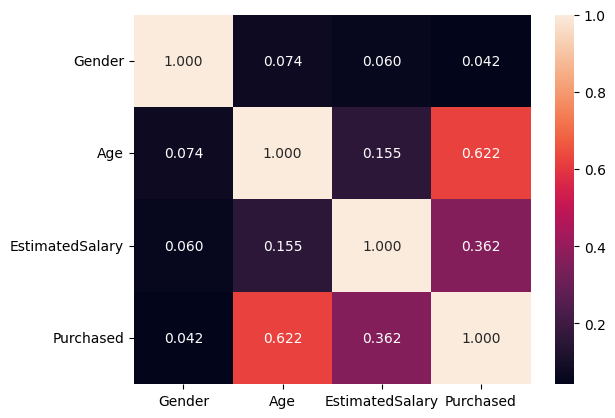

In [10]:
sns.heatmap(df.corr(),annot=True,fmt=".3f")

### Plot a countplot of gender with respect to purchased

<Axes: xlabel='Gender', ylabel='count'>

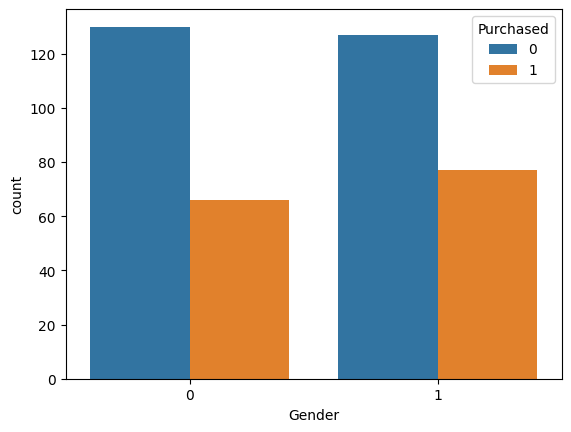

In [11]:
sns.countplot(x="Gender",data=df,hue="Purchased")

### Plot a displot of Age

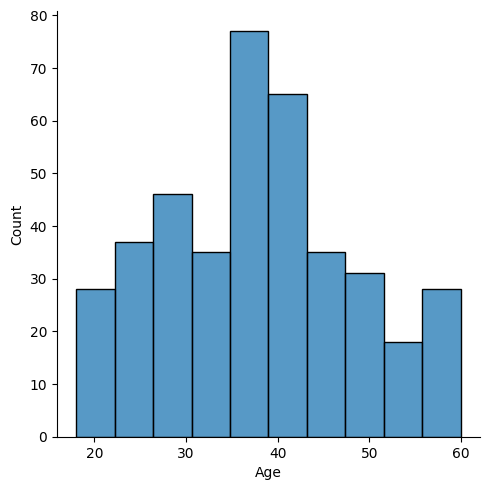

In [12]:
sns.displot(x="Age",data=df)

### Plot pairplot of the dataset

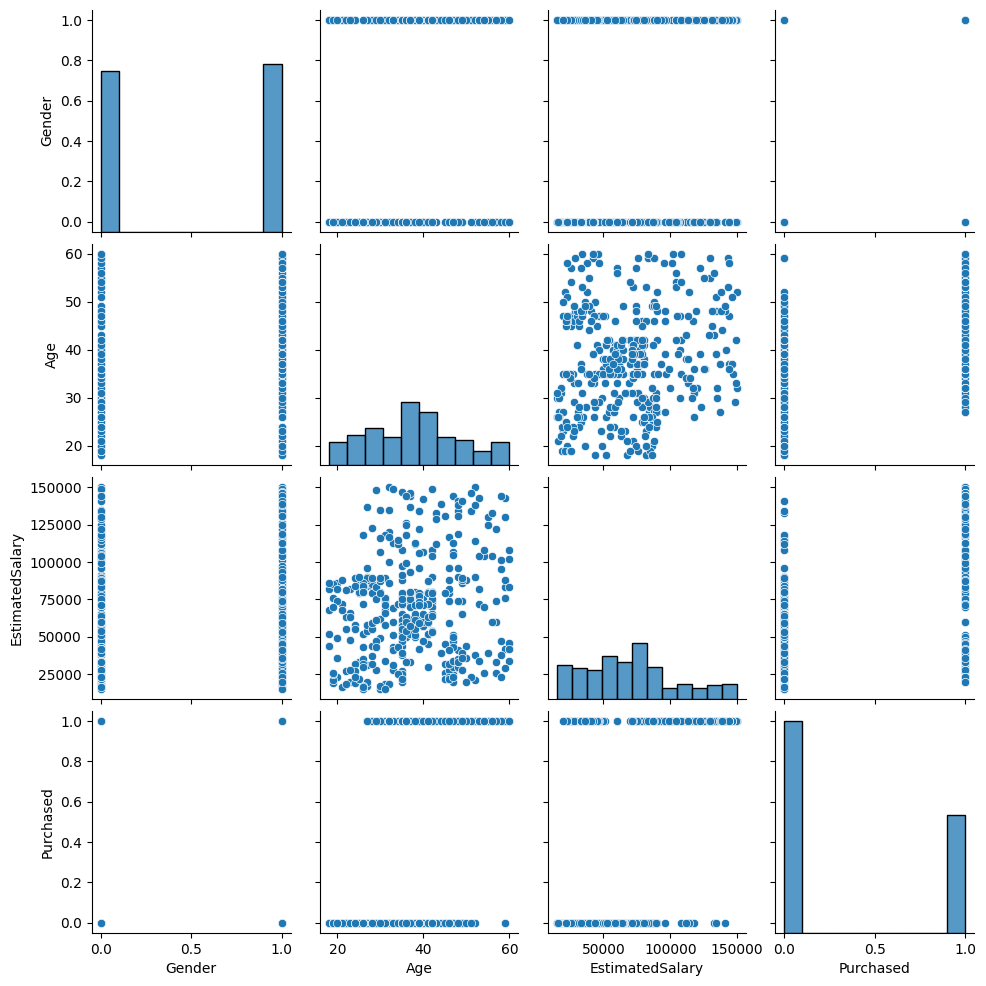

In [13]:
sns.pairplot(df)

## Data Preprocessing

### Split the dataset into input and target variables

In [14]:
X=df.drop(["Purchased"],axis="columns")
y=df["Purchased"]

### Scale the data using StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xcolumns=X.columns
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=xcolumns)


In [16]:
X.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


In [17]:
X.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


### Split the dataset into training and testing set

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)


### Check shape of X_train and X_test

In [20]:
X_train.shape

(300, 3)

In [21]:
X_test.shape

(100, 3)

## ML Models

### Logistic Regression Classifier

In [22]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [23]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [24]:
print(f"Score of our model is: {model.score(X_train,y_train)}")

Score of our model is: 0.85


In [25]:
y_pred=model.predict(X_test)
from sklearn import metrics
print(f"Accuracy score of our prediction is: {metrics.accuracy_score(y_test,y_pred)}")

Accuracy score of our prediction is: 0.87


In [26]:
print(f"Confusion matrix is:\n{metrics.confusion_matrix(y_test,y_pred)}")
print(f"Classification Report is:\n{metrics.classification_report(y_test,y_pred)}")

Confusion matrix is:
[[62  3]
 [10 25]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91        65
           1       0.89      0.71      0.79        35

    accuracy                           0.87       100
   macro avg       0.88      0.83      0.85       100
weighted avg       0.87      0.87      0.87       100



In [27]:
print(f"Mean of cross validation score is: {np.mean(cross_val_score(LogisticRegression(),X,y,cv=20))}")

Mean of cross validation score is: 0.8350000000000002


### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
random_model=RandomForestClassifier(n_estimators=20)
random_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [30]:
print(f"Score of our trained model is:  {random_model.score(X_train,y_train)}")

Score of our trained model is:  0.9933333333333333


In [31]:
y_pred=random_model.predict(X_test)
from sklearn import metrics
print(f"Accuracy score of our prediction is: {metrics.accuracy_score(y_test,y_pred)}")

Accuracy score of our prediction is: 0.91


In [32]:
print(f"Confusion matrix is:\n{metrics.confusion_matrix(y_test,y_pred)}")

Confusion matrix is:
[[62  3]
 [ 6 29]]


In [33]:
print(f"classification report is:\n{metrics.classification_report(y_test,y_pred)}")

classification report is:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        65
           1       0.91      0.83      0.87        35

    accuracy                           0.91       100
   macro avg       0.91      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



In [34]:
from sklearn.model_selection import cross_val_score
print(f"Mean of Cross Validation score is:  {np.mean(cross_val_score(RandomForestClassifier(),X,y,cv=20))}")

Mean of Cross Validation score is:  0.8875


### Support Vector Machine

In [35]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)


SVC()

In [36]:
print(f"Score of our trained model is {svc_model.score(X_train,y_train)}")

Score of our trained model is 0.9033333333333333


In [37]:
y_pred=svc_model.predict(X_test)
print(f"Accuracy of our prediction is:  {metrics.accuracy_score(y_test,y_pred)}")

Accuracy of our prediction is:  0.92


In [38]:
print(f"Confusion matrix is:\n{metrics.confusion_matrix(y_test,y_pred)}")

Confusion matrix is:
[[62  3]
 [ 5 30]]


In [39]:
print(f"Classification report is:\n{metrics.classification_report(y_test,y_pred)}")

Classification report is:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.91      0.86      0.88        35

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [40]:
from sklearn.model_selection import cross_val_score
print(f"Mean of Cross validation score is: {np.mean(cross_val_score(SVC(),X,y,cv=10))}")

Mean of Cross validation score is: 0.905


### Assign cross val scores of all models into a dataframe

In [41]:
cross_val_df=pd.DataFrame({"model":["Logistic Regression","Random Forest Classifier","Support Vector Machine"],"Scores":[0.83500,0.88999,0.905]})
cross_val_df

,model,Scores
0,Logistic Regression,0.83500
1,Random Forest Classifier,0.88999
2,Support Vector Machine,0.90500


***

## Deploy the model with highest score using Tkinter

In [42]:
### In this case its SVM Classifier

#### Import all modules from Tkinter

In [46]:
from tkinter import *
from tkinter.ttk import Combobox

### Define a function that will output to an entry box in Tkinter

In [47]:
def getprediction():
    gender=genderentry.get()
    age=float(ageentry.get())
    estimated_salary=float(estimated_salaryentry.get())

    if gender == 'Male':
        gender = 0
    else:
        gender = 1

    x = scaler.transform([[gender,age,estimated_salary]])
    prediction = random_model.predict(x)

    result.delete(0, END)
    
    if prediction[0] == 0:
        result.insert(0, 'Not Purchased')
    else:
        result.insert(0, 'Purchased')

   



### Create Tkinter window with all necessary entryboxes and labels

In [54]:
from tkinter import Tk, Label, Entry, Button
from tkinter.ttk import Combobox

window = Tk()
window.title('Customer Behaviour Classification')
window.geometry('400x600')

titlelb = Label(window, text='Customer Behaviour Classification', bg="grey")
titlelb.grid(row=0, column=0, columnspan=2, pady=10, sticky="nsew")

genderlb = Label(window, text='Gender')
genderlb.grid(row=1, column=0, padx=10, pady=5, sticky="w")
genderentry = Combobox(window)
genderentry['values'] = ('Male', 'Female')
genderentry.current( ) 
genderentry.grid(row=1, column=1, padx=10, pady=5)


agelb = Label(window, text='Age')
agelb.grid(row=2, column=0, padx=10, pady=5, sticky="w")
ageentry = Entry(window)
ageentry.grid(row=2, column=1, padx=10, pady=5)

estimated_salarylb = Label(window, text='Estimated Salary')
estimated_salarylb.grid(row=3, column=0, padx=10, pady=5, sticky="w")
estimated_salaryentry = Entry(window)
estimated_salaryentry.grid(row=3, column=1, padx=10, pady=5)


button = Button(window, text='Get Prediction', command=getprediction) 
button.grid(row=4, column=0, columnspan=2, pady=10)

resultlb = Label(window, text="Result")
resultlb.grid(row=5, column=0, padx=10, pady=5, sticky="w")
result = Entry(window)
result.grid(row=5, column=1, padx=10, pady=5)

window.mainloop()


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


***

# <span style = "color:green;font-size:40px"> Great Job! </span>